In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import sys

# Image Compression using SVD

Equation for Singular Value Decomposition (SVD) is given by:
$$
A = \sum_{i=1}^{r} \sigma_i * u_i * v_i^T
$$
But for image compression, we can approximate the image matrix A by using only the first k singular values and vectors. The equation for approximating the image matrix A is given by:
$$
A \approx \sum_{i=1}^{k} \sigma_i * u_i * v_i^T
$$
where k is the number of singular values and vectors used for approximation.
$$ 
k << r
$$
where r is the rank of the matrix A.

## 1. Setup variables

In [2]:
FNAME = 'lenna.png'
COMPRESSION_K = 10

## 2. Load Image to array

In [3]:
image = Image.open(FNAME).convert('L') # greyscale
A = np.asarray(image)                  # image to array

## 3. Perform SVD on the image matrix

In [4]:
u, s, v = np.linalg.svd(A) # svd decomposition
B = np.zeros(A.shape)      # compressed image array

## 4. Compress the image matrix

In [5]:
BREAK = min(max(A.shape), 10)                # max size k iterations
for i in range(min(A.shape[0], A.shape[1])): # photo size (r iterations) k << r
    B += s[i] * np.outer(u.T[i], v[i])       # count sigma
    if i == BREAK:
        break

## 5. Show the compressed image

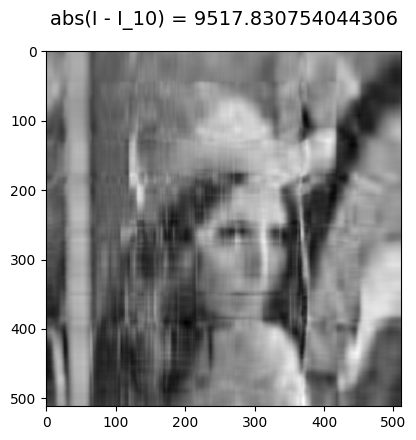

In [6]:
fig, ax = plt.subplots()
fig.subplots_adjust(top=0.85)          # Adjust top margin to make space for title
fig_image = ax.imshow(B, cmap='gray')  # Display the compressed image
ax.set_title(f'abs(I - I_{BREAK}) = {np.linalg.norm(A-B)}', fontsize=14, y=1.05)
#plt.savefig(f'compressed_{fname}_r{BREAK}.png') # save compressed image
plt.show()